In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

0
1
NVIDIA GeForce GTX 1650 Ti


device(type='cuda', index=0)

### Information Theory Basics

In [6]:
# first I will build the datasets which will be a two dimension array
import numpy as np

p = [[1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0]]
sum_x = np.sum(p, axis=1)
sum_y = np.sum(p, axis=0)

In [23]:
# a. Is H(x|y) = H(y|x)
# we have H(x|y) = -sigma(x)sigma(y)(P(x, y)*log(p(x|y)))
# also H(y|x) = -sigma(x)sigma(y)(P(y, x)*log(P(y|x)))
# loop through every possible x, y and use the formula H(x|y) = -sigma(P(x|y)*log(p(x|y))
# i represent x and j represent y
x_given_y = 0
y_given_x = 0
for j in range(4):
    for i in range(4):
        if(p[i][j]):
            x_given_y -= p[i][j]*np.log2(p[i][j]/sum_y[j])

for i in range(4):
    for j in range(4):
        if p[i][j]:
            y_given_x -= p[i][j]*np.log2(p[i][j]/sum_x[i])
print("a.")
print(f"H(X|Y) = {x_given_y}")
print(f"H(X|Y) = {y_given_x}")
print("we have x_given_y != y_given_x or H(x|y) != H(y|x)")

entropy_x = 0
entropy_y = 0
for i in range(4):
    entropy_x -= sum_x[i]*np.log2(sum_x[i])
    entropy_y -= sum_y[i]*np.log2(sum_y[i])
print("b.")
print(f"H(X) - H(X-Y) = {entropy_x-x_given_y}")
print(f"H(Y) - H(Y|X) = {entropy_y-y_given_x}")
print("we have H(X) - H(X-Y) = H(Y) - H(Y|X)")

mut_info = 0
for i in range(4):
    for j in range(4):
        if p[i][j]: mut_info += p[i][j]*np.log2(p[i][j]/(sum_x[i]*sum_y[j]))
print("c.")
print(f"the mutual information is: I(X, Y) = {mut_info}")

a.
H(X|Y) = 1.625
H(X|Y) = 1.375
we have x_given_y != y_given_x or H(x|y) != H(y|x)
b.
H(X) - H(X-Y) = 0.375
H(Y) - H(Y|X) = 0.375
we have H(X) - H(X-Y) = H(Y) - H(Y|X)
c.
the mutual information is: I(X, Y) = 0.375


### Maximum Likelihood Parameter Estimation

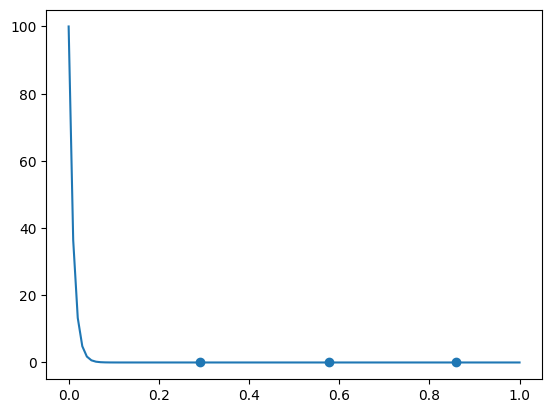

probability defsity function in [0.57784639] seconds: [8.02509319e-24]
probability defsity function in [0.29111728] seconds: [2.27476842e-11]
probability defsity function in [0.85953141] seconds: [4.68840678e-36]


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# create 1000 points in the exponential distribution for ploting
hyperpara = 100
x = np.linspace(0, 1, 100)
y = [hyperpara * np.exp(-scalar*hyperpara) for scalar in x]
plt.plot(x, y)
sample_x = np.random.rand(3, 1)
sample_y = [hyperpara * np.exp(-scalar*hyperpara) for scalar in sample_x]
plt.scatter(sample_x, sample_y)
plt.show()
for i in range(3):
    print(f"probability defsity function in {sample_x[i]} seconds: {sample_y[i]}")


The goal is to **minimize the negative log-likelihood** of the exponential distribution. We denote the negative log-likelihood as:

-ln(L(lambda)) = -ln(product p(x_i | lambda))

Thus the final equation of negative log-likelihood

-ln(L(lambda)) = -ln(lambda^n * e^{-lambda * sigma(x_i)}) = -n ln(lambda) + lambda * sigma(x_i)


In [31]:
import numpy as np

# Generate some sample data from exponential distribution
x = np.random.exponential(1/100, size=1000)  # true parameter = 100

epochs = 1000
para = 100  # initial parameter value
lr = 3e-4
n = 1000

for epoch in range(epochs):
    # Correct gradient for exponential distribution MLE
    gradient = -n/para + para*np.sum(x)  # derived from log-likelihood
    para -= lr * gradient
    print(f"Parameter value: {para:.4f}")

print(f"Final parameter value: {para:.4f}")


Parameter value: 99.6957
Parameter value: 99.3923
Parameter value: 99.0898
Parameter value: 98.7883
Parameter value: 98.4877
Parameter value: 98.1881
Parameter value: 97.8893
Parameter value: 97.5915
Parameter value: 97.2947
Parameter value: 96.9987
Parameter value: 96.7037
Parameter value: 96.4096
Parameter value: 96.1164
Parameter value: 95.8241
Parameter value: 95.5327
Parameter value: 95.2423
Parameter value: 94.9527
Parameter value: 94.6640
Parameter value: 94.3763
Parameter value: 94.0894
Parameter value: 93.8034
Parameter value: 93.5183
Parameter value: 93.2341
Parameter value: 92.9507
Parameter value: 92.6683
Parameter value: 92.3867
Parameter value: 92.1060
Parameter value: 91.8262
Parameter value: 91.5473
Parameter value: 91.2692
Parameter value: 90.9919
Parameter value: 90.7156
Parameter value: 90.4401
Parameter value: 90.1654
Parameter value: 89.8917
Parameter value: 89.6187
Parameter value: 89.3466
Parameter value: 89.0754
Parameter value: 88.8050
Parameter value: 88.5354
